In [1]:
import pandas as pd
import clustering as cl

In [2]:
file ="output/merged.xlsx"
df = pd.read_excel(file)

In [3]:
cols = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

Top 25 (1.64%) clients account for 80.25% of the total consumption or sales.
(261, 11)


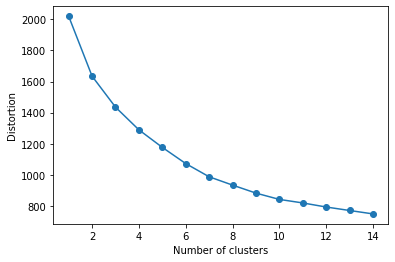

KeyError: 'item_name'

In [4]:
main_items = cl.large_clients_finder(data=df, client_id_col_name='contractor', value_col_name='契約金額(円)', threshold_rate=0.8)
df_pivoted = cl.get_pivoted_df(df=df, columns=['JFY'], index="contractor", values="契約金額(円)")
non_null_df = cl.get_non_null_df(df_pivoted, total=True)
print(non_null_df.shape)
df_std = cl.get_starnderdized_df(df=non_null_df, values_cols=cols,  plot=False)
distortions = cl.get_distortions_elbow_method(df=df_std, num_cluster=15, plot=True)
test = cl.get_clustered_df(df=df_std, num_clusters=3)
df_clustered = cl.add_removed_cols(df=test, non_null_df=non_null_df, cols=["contractor", "total"])
cl.plot_cluters(df_clustered, cols, 3)